In [1]:
%matplotlib inline
from __future__ import print_function
import numpy
import matplotlib.pyplot as plt

# 1D Burgers equation with periodic boundary

Burgers' equation is a fundamental partial differential equation occurring in various areas of applied mathematics, such as fluid mechanics, traffic flow.

The viscid Burgers equation is also considered as a simplified form of the Navier–Stokes equation due to the presence of nonlinear convection term and the linear viscosity term.

$$
\frac{\partial u}{\partial t} +u \frac{\partial u}{\partial x} = \nu \frac{\partial  u^2}{\partial ^2 x}
$$

$$
u(0)=u(L)=0
$$

$$
IC:u(x,0)=sin(2 \pi x)
$$

We solve the Burgers equation by transforming it into a linear heat equation via the Cole–Hopf transformation.

Write the orgininal function as 
$$\frac{\partial u}{\partial t} +\frac{\partial}{\partial x}(\frac{u^2}{2}-\nu \frac{\partial u}{\partial x})=0$$

Then we can write $u = \zeta_x$, get $$\frac{u^2}{2}-\nu \frac{\partial u}{\partial x} = -\zeta_t$$

Write $$\epsilon (x,t) = e^{-\frac{\zeta}{2 \nu}}$$
Then $$\zeta = -2\nu \log \epsilon$$

Substitute this back, we get the heat equation $$\epsilon_t = \nu \epsilon_{xx}$$

Now solution u can be written as $$u(x,t)=\zeta_x = -2\nu \frac{\epsilon_x}{\epsilon}$$

initial condition $$u(x,0) = f(x)= -2\nu \frac{\epsilon_x (x,0)}{\epsilon (x,0)}$$

$$\epsilon(x,0) = \epsilon(0,0) exp({\frac{-\int_0^x u(x',0)dx'}{2\nu}})$$

For boundary conditions

$$u(0,t) = -2\nu \frac{\epsilon_x (0,t)}{\epsilon} ~~~~\rightarrow ~~~~\epsilon_x + \frac{u(0,t)}{2\nu} = 0$$
$$u(L,t) = -2\nu \frac{\epsilon_x (L,t)}{\epsilon} ~~~~\rightarrow ~~~~\epsilon_x + \frac{u(L,t)}{2\nu} = 0$$

For our analysis, we set $u(x,0) = f(x) = sin(2\pi x)$

boundary conditions $u(0,t)=u(1,t) = 0$

Now we can solve the heat equation $$\epsilon_t = \nu \epsilon_{xx}$$ 

With Initial condition:

$$\epsilon(x,0) = exp({\frac{-\int_0^x f(x')dx'}{2\nu}} )=exp({\frac{-\int_0^x sin(2\pi x')dx'}{2\nu}})=exp({\frac{cos(2\pi x)-1}{4 \pi \nu}})$$

And Neumann boundary conditions:

$$\epsilon_x (0,t) =\epsilon_x (1,t) = 0$$

$$
\epsilon(x,t) = a_0 + \sum_{n=1}^{\infty} a_n e^{-n^2 \pi^2 \nu t} cos(n\pi x)
$$

$$
a_0 = \int_0^1 \epsilon (x,0)dx = \int_0^1 exp({\frac{cos(2\pi x)-1}{4 \pi \nu}})dx
$$

$$
a_n = 2 \int_0^1 \epsilon (x,0) cos(n\pi x)dx = 2 \int_0^1 exp({\frac{cos(2\pi x)-1}{4 \pi \nu}}) cos(n\pi x)dx
$$

$$
\epsilon_x = \sum_{n=1}^{\infty} -n \pi a_n e^{-n^2 \pi^2 \nu t} sin(n\pi x)
$$

In [2]:
#Visualizing the equation
#problem set up
nu = 0.01
m = 200
x = numpy.linspace(0, 1, m)
U_0 = numpy.sin(2*numpy.pi*x)

In [8]:
import scipy.integrate as integrate
# Define the true solution
def ufunc(x,t,nu):
    """Analytic solution for viscid burgers eqution with periodic boundary condions
    :Input:
    - *nu* (float) Diffusion coefficient
    - *t* (float) Time to integrate to (t_0 set to zero)
    - *x* (numpy.ndarray) points to be evaluated
    :Output:
    - (numpy.ndarray) Solution at time t
    """
    #Calculate the coefficients an
    N=30
    a = numpy.empty(N)
    an = integrate.quad(lambda x: numpy.exp((numpy.cos(2* numpy.pi *x)-1)/(4*numpy.pi*nu)), 0, 1)
    a[0] = an[0]-an[1]
    for n in range(1,N):
        an=integrate.quad(lambda x: numpy.exp((numpy.cos(2* numpy.pi *x)-1)/(4*numpy.pi*nu)) * numpy.cos(n*numpy.pi*x), 0, 1)
        a[n] = (an[0] - an[1])*2
    
    #Calculate u
    fx = 0
    f =a[0]
    for n in range(1,N):
        fx +=  n*numpy.pi*a[n]*numpy.exp(-(n*numpy.pi)**2 *nu*t) *numpy.sin(n*numpy.pi*x)
        f += a[n]*numpy.exp(-(n*numpy.pi)**2 *nu*t) *numpy.cos(n*numpy.pi*x)
        
    return 2*nu*fx/f
    

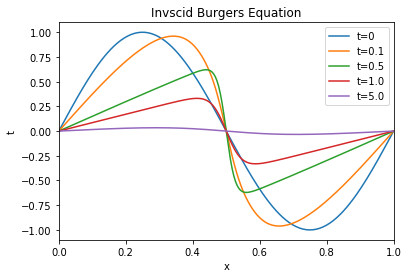

In [9]:
#Plot the true solution develop with time
U_1 = ufunc(x,0.1,nu)
U_2 = ufunc(x,0.5,nu)
U_3 = ufunc(x,1.0,nu)
U_4 = ufunc(x,5.0,nu)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, U_0,label = 't=0')
axes.plot(x, U_1,label = 't=0.1')
axes.plot(x, U_2,label = 't=0.5')
axes.plot(x, U_3,label = 't=1.0')
axes.plot(x, U_4,label = 't=5.0')


axes.set_xlim((0, 1.0))
axes.set_title("Invscid Burgers Equation")
axes.set_xlabel("x")
axes.set_ylabel("t")
axes.legend()


# Physical interpretation

From the above graph we can see a wave convects from left to right. The point with higher value of convects faster than point with lower value. 

# Explicit Method  - center in space and forward in time

$$
    \frac{U^{n+1}_j - U^n_j}{\Delta t} + U^n_j \frac{U^n_{j+1} - U^n_{j-1}}{2 \Delta x}= \nu \frac{U^n_{j+1} -2U^n_j + U^n_{j-1}}{\Delta x^2} 
$$

Reorganize the equation, we get

$$\begin{align}
    U^{n+1}_j &= U^n_j - \frac{\Delta t}{2 \Delta x} U^n_j (U^n_{j+1} - U^n_{j-1}) + \nu \frac{\Delta t}{\Delta x^2}(U^n_{j+1}-2U^n_j + U^n_{j-1}) \\
    &= (1- 2\nu \frac{\Delta t}{\Delta x^2}) U^n_j- \frac{\Delta t}{2 \Delta x} U^n_j (U^n_{j+1} - U^n_{j-1}) + \nu \frac{\Delta t}{\Delta x^2}(U^n_{j+1}+ U^n_{j-1})
\end{align}$$

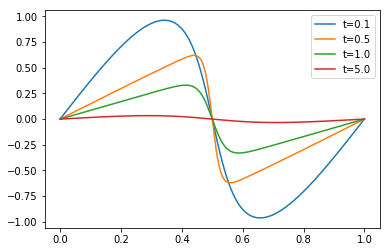

In [10]:
def burgers_explicit(U_0,m,t_0,t_f,nu):
    """Solve the burgers equation with periodic boundary using explicit
    
    :Input:
     - *m* (int) Number of points use to discretize the domain. 
     - *nu* (float) Diffusion coefficient
     - *t_0* (float) Starting time
     - *t_final* (float) Time to integrate to
     - *U_0* (numpy.ndarray) Initial condition at time t_0
     
    :Output:
     - (numpy.ndarray) Solution at time t_final.
    """
    x=numpy.linspace(0,1,m)
    delta_x = x[1]-x[0]
    dt = delta_x**2/(2*nu)
    N=int((t_f-t_0)/dt+1)
    delta_t = (t_f-t_0)/N
    u=U_0.copy()
    for n in range(N):
        un = u.copy()
        for i in range(1, m-1):
            u[i] = un[i] - un[i] * delta_t / (2 * delta_x) *(un[i+1] - un[i-1]) + nu * delta_t / delta_x**2 *\
                    (un[i+1] - 2 * un[i] + un[i-1])
            u[-1] =u[0] = 0
    return  u

t_0=0
t_f=0.5
m=200
nu = 0.01
x = numpy.linspace(0, 1, m)
U_0 = numpy.sin(2*numpy.pi*x)
u1=burgers_explicit(U_0,m,t_0,0.1,nu)
u2=burgers_explicit(U_0,m,t_0,0.5,nu)
u3=burgers_explicit(U_0,m,t_0,1.0,nu)
u4=burgers_explicit(U_0,m,t_0,5.0,nu)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, u1, label = 't=0.1')
axes.plot(x, u2, label = 't=0.5')
axes.plot(x, u3, label = 't=1.0')
axes.plot(x, u4, label = 't=5.0')
axes.legend()
plt.show()


# Von Neumann Analysis

$$ U^{n+1}_j = (1- 2\nu \frac{\Delta t}{\Delta x^2}) U^n_j- \frac{\Delta t}{2 \Delta x} U^n_j (U^n_{j+1} - U^n_{j-1}) + \nu \frac{\Delta t}{\Delta x^2}(U^n_{j+1}+ U^n_{j-1})$$

Setting $U^n_j = e^{i j \Delta x \xi}$ we have

$$\begin{align}
U_j^{n+1} &= (1- 2\nu \frac{\Delta t}{\Delta x^2}) U^n_j- \frac{\Delta t}{2 \Delta x} U^n_j (e^{i \Delta x \xi}U^n_j - e^{-i \Delta x \xi}U^n_j) + \nu \frac{\Delta t}{\Delta x^2}(e^{i \Delta x \xi}U^n_j+e^{-i \Delta x \xi} U^n_j) \\
&= (1- 2\nu \frac{\Delta t}{\Delta x^2})U^n_j- \frac{\Delta t}{2 \Delta x} (U^n_j)^2 (e^{i \Delta x \xi} - e^{-i \Delta x \xi}) + \nu \frac{\Delta t}{\Delta x^2}U^n_j(e^{i \Delta x \xi}+e^{-i \Delta x \xi}) \\
&= (1- 2\nu \frac{\Delta t}{\Delta x^2}+ \nu \frac{2\Delta t}{\Delta x^2} cos(\Delta x \xi))U^n_j- \frac{\Delta t}{ \Delta x} (U^n_j)^2 sin( \Delta x \xi) 
\end{align}$$

that, since $-1 \leq \cos (\xi \Delta x) \leq 1$ for all $\xi$

$$
    1- 4\nu \frac{\Delta t}{\Delta x^2} \leq g(\xi) \leq 1 \quad \forall \xi.
$$

Therefore, we know the method is stable if 
$$
    \frac{\Delta t}{\Delta x^2} \leq \frac{1}{2\nu}
$$

# Error Analysis

Use taylor's expansion
$$
U_j^{n+1} = u + \Delta t u_t +\frac{1}{2} \Delta t^2 u_{tt}
$$

$$
U_{j+1}^n - 2U_j^n +U_{j-1}^n = \Delta x^2 u_xx +\frac{1}{12} \Delta x^4 u_{xxxx}
$$

$$
U_{j+1}^n - U_{j-1}^n = 2 \Delta x u_x +\frac{1}{3} \Delta x^3 u_{xxx}
$$

$$
u + \Delta t u_t +\frac{1}{2} \Delta t^2 u_{tt}= u + \nu \frac{\Delta t}{\Delta x^2}(\Delta x^2 u_{xx} +\frac{1}{12} \Delta x^4 u_{xxxx}) - \frac{\Delta t}{2 \Delta x^2}u(2 \Delta x u_x +\frac{1}{3} \Delta x^3 u_{xxx})
$$

$$
u_t +\frac{1}{2} \Delta t u_{tt}=  \nu (u_{xx} +\frac{1}{12} \Delta x^2 u_{xxxx}) - u u_x - \frac{1}{6} \Delta x^2 u u_{xxx}
$$

$$
u_t + u u_x -\nu u_{xx} =-\frac{1}{2} \Delta t u_{tt}+  \nu \frac{1}{12} \Delta x^2 u_{xxxx} - \frac{1}{6} \Delta x^2 u u_{xxx}
$$

Therefore, the method should be second order in space and second order in time.

Text(0,0.5,'$|u(x) - U|$')

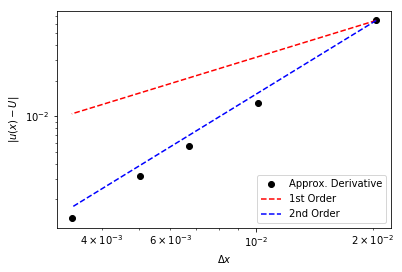

In [12]:
t_0=0.0
t_f=0.5
nu=0.01


order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))

m_range = [50,100,150, 200,300]

delta_x = numpy.empty(len(m_range))
error = numpy.empty(len(m_range))
for (i, m) in enumerate(m_range):

    x = numpy.linspace(0.0, 1, m)
    delta_x[i] = 1 / (m-1)
    U_0 = numpy.sin(2*numpy.pi*x)
    U_true =  numpy.asarray([ufunc(x0,t_f,nu) for x0 in x])
    

    # Compute solution
    U = burgers_explicit(U_0,m,t_0,t_f,nu)
    error[i] = numpy.linalg.norm(U - U_true, ord=numpy.infty)
       
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.loglog(delta_x, error, 'ko', label="Approx. Derivative")

axes.loglog(delta_x, order_C(delta_x[0], error[0], 1.0) * delta_x**1.0, 'r--', label="1st Order")
axes.loglog(delta_x, order_C(delta_x[0], error[0], 2.0) * delta_x**2.0, 'b--', label="2nd Order")
axes.legend(loc=4)

axes.set_xlabel("$\Delta x$")
axes.set_ylabel("$|u(x) - U|$")

# Stability Analysis

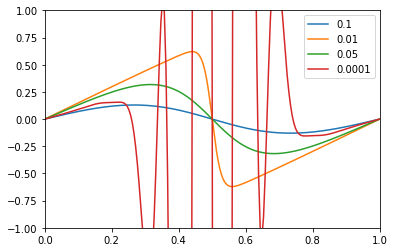

In [74]:
nu_range = numpy.array([0.1,0.01,0.05,0.0001])
m = 200
x = numpy.linspace(0, 1, m)
U_0 = numpy.sin(2*numpy.pi*x)
t=0.5
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
for nu in nu_range:
    U=burgers_explicit(U_0,m,0.0,t,nu)
    
    axes.plot(x, U, label = nu)
    axes.set_xlim(0.0,1.0)
    axes.set_ylim(-1.0,1.0)
    axes.legend()

We see the lower the kinematic viscosity, the higher the value of u. 

And the explicit method is not stable for small $\nu$

# Implicit Method - Crank-Nicolson


$$
    \frac{U^{n+1}_j - U^n_j}{\Delta t} + \frac{1}{4 \Delta x}(U^{n+1}_j (U^n_{j+1} - U^n_{j-1}) +U^{n}_j (U^{n+1}_{j+1} - U^{n+1}_{j-1}) )=  \frac{\nu}{2\Delta x^2} (U^n_{j+1} -2U^n_j + U^n_{j-1} + U^{n+1}_{j+1} -2U^{n+1}_j + U^{n+1}_{j-1})
$$


Reorganize, we get

$$
(-r + p u_j^n) u_{j+1}^{n+1} + (2r +1+pu_{j+1}^n - p u_{j-1}^n) u_j^{n+1} -(r+pu_j^n)u_{j-1}^{n+1} = r u_{j+1}^{n} + (1-2r) u_j^{n} -ru_{j-1}^{n}
$$

With 
$$r=\frac{\nu \Delta t}{2 \Delta x^2}$$

$$p=\frac{\Delta t}{4 \Delta x}$$

In [30]:
import scipy.sparse as sparse
import scipy.sparse.linalg as linalg


t_0=0
t_f=0.5

m=200
nu = 0.01
x = numpy.linspace(0, 1, m)
U_0 = numpy.sin(2*numpy.pi*x)


def implicit(U_0,m,t_0,t_f,nu):
    """Solve the burgers equation with periodic boundary using implicit
    
    :Input:
     - *m* (int) Number of points use to discretize the domain. 
     - *nu* (float) Diffusion coefficient
     - *t_0* (float) Starting time
     - *t_final* (float) Time to integrate to
     - *U_0* (numpy.ndarray) Initial condition at time t_0
     
    :Output:
     - (numpy.ndarray) Solution at time t_final.
    """
    # Initial condition
    x = numpy.linspace(0, 1, m)
    delta_x = x[1]- x[0]
    dt = delta_x
    N=int((t_f-t_0)/dt+1)
    delta_t = (t_f-t_0)/N
    U = U_0.copy()

    r = nu * delta_t / (2*delta_x**2)
    p = delta_t/(4*delta_x)

    B = numpy.zeros((m, m))
    diagonal = numpy.ones(m)
    B += numpy.diag(diagonal * (1-2*r), 0)
    B += numpy.diag(diagonal[:-1]*r, 1)
    B += numpy.diag(diagonal[:-1]*r, -1)

    # Time stepping loop
    for n in range(N):
        # Build solving matrix
        d= numpy.zeros(m)
        d[0] = U[1]-U[0]
        d[1:-1] = U[2:] - U[:-2]
        d[-1] = U[-1] - U[-2]
        b = numpy.ones(m) * (1+2*r)+ p *d
        c = -U[1:]*p - numpy.ones(m-1)*r
        a = U[:-1]*p - numpy.ones(m-1)*r    


        A = numpy.zeros((m, m))

        A += numpy.diag(b, 0)
        A += numpy.diag(a, 1)
        A += numpy.diag(c, -1)

        


        # Construct right-hand side
        b = B.dot(U)
        # Solve system
        U = numpy.linalg.solve(A, b)
    return U
    
    

    
    


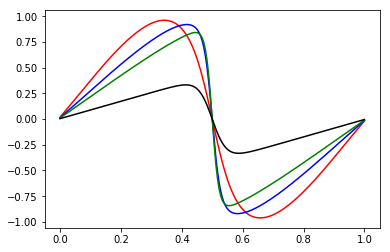

In [31]:
u1=implicit(U_0,m,t_0,0.1,nu)
u2=implicit(U_0,m,t_0,0.2,nu)
u3=implicit(U_0,m,t_0,0.3,nu)
u4=implicit(U_0,m,t_0,1,nu)


fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, u1, 'r')
axes.plot(x, u2, 'b')
axes.plot(x, u3, 'g')
axes.plot(x, u4, 'k')

plt.show()

# Error Analysis

$$
    \frac{U^{n+1}_j - U^n_j}{\Delta t} + \frac{1}{4 \Delta x}(U^{n+1}_j (U^n_{j+1} - U^n_{j-1}) +U^{n}_j (U^{n+1}_{j+1} - U^{n+1}_{j-1}) )=  \frac{\nu}{2\Delta x^2} (U^n_{j+1} -2U^n_j + U^n_{j-1} + U^{n+1}_{j+1} -2U^{n+1}_j + U^{n+1}_{j-1})
$$

$$
U_j^{n+1} -U_j^n = \Delta t u_t +\frac{1}{2} \Delta t^2 u_{tt}
$$

$$
U_{j+1}^n - 2U_j^n +U_{j-1}^n = \Delta x^2 u_xx +\frac{1}{12} \Delta x^4 u_{xxxx}
$$

$$
U_{j+1}^n - U_{j-1}^n = 2 \Delta x u_x +\frac{1}{3} \Delta x^3 u_{xxx}
$$

$$
U_{j+1}^{n+1} - 2U_j^{n+1} +U_{j-1}^{n+1} = \Delta x^2 u_xx +\frac{1}{3} \Delta t^3 u_{ttt} + \Delta x^2 \Delta t u_{xxt}
$$

$$
U_{j+1}^{n+1} - U_{j-1}^{n+1} = 2 \Delta x u_x +2 \Delta x \Delta t u_{xt} + \frac{1}{3} \Delta x^3 u_{xxx} + \Delta x \Delta t^2 u_{xtt}
$$


$$
    \frac{U^{n+1}_j - U^n_j}{\Delta t} + \frac{1}{4 \Delta x}(U^{n+1}_j (U^n_{j+1} - U^n_{j-1}) +U^{n}_j (U^{n+1}_{j+1} - U^{n+1}_{j-1}) ) - \frac{\nu}{2\Delta x^2} (U^n_{j+1} -2U^n_j + U^n_{j-1} + U^{n+1}_{j+1} -2U^{n+1}_j + U^{n+1}_{j-1})$$
    
$$ = (u_t - \nu u_{xx} + u u_x)_t \frac{\Delta t}{2} + O(\Delta t^2 , \Delta x^2)$$

Text(0,0.5,'$|u(x) - U|$')

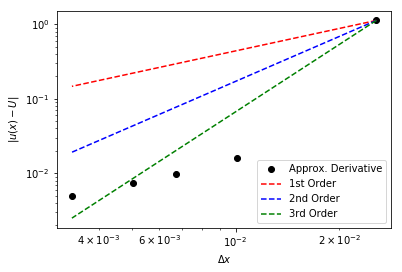

In [33]:
order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))

m_range = [40,100,150, 200,300]

delta_x = numpy.empty(len(m_range))
error = numpy.empty(len(m_range))
for (i, m) in enumerate(m_range):

    x = numpy.linspace(0.0, 1, m)
    delta_x[i] = 1 / (m-1)
    U_0 = numpy.sin(2*numpy.pi*x)
    U_true =  ufunc(x,t_f,nu)
    

    # Compute solution
    U = implicit(U_0,m,t_0,t_f,nu)
    error[i] = numpy.linalg.norm(U - U_true, ord=numpy.infty)
       
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.loglog(delta_x, error, 'ko', label="Approx. Derivative")

axes.loglog(delta_x, order_C(delta_x[0], error[0], 1.0) * delta_x**1.0, 'r--', label="1st Order")
axes.loglog(delta_x, order_C(delta_x[0], error[0], 2.0) * delta_x**2.0, 'b--', label="2nd Order")
axes.loglog(delta_x, order_C(delta_x[0], error[0], 3.0) * delta_x**3.0, 'g--', label="3rd Order")
axes.legend(loc=4)

axes.set_xlabel("$\Delta x$")
axes.set_ylabel("$|u(x) - U|$")

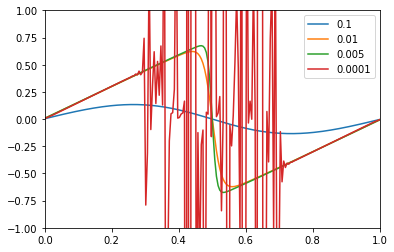

In [75]:
nu_range = numpy.array([0.1,0.01,0.005,0.0001])
m = 200
x = numpy.linspace(0, 1, m)
U_0 = numpy.sin(2*numpy.pi*x)
t=0.5
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
for nu in nu_range:
    U=implicit(U_0,m,0.0,t,nu)
    
    axes.plot(x, U, label = nu)
    axes.set_xlim(0.0,1.0)
    axes.set_ylim(-1.0,1.0)
    axes.legend()

Implicit method is also not stable for small $\nu$

### Spectral Methods

Since we are using periodic boundary conditions and a smooth solution is expected.  We can try to solve the problem using spectral method

Write the original problem as 

$$
\frac{\partial u}{\partial t} +\frac{\partial}{\partial x}(\frac{u^2}{2}) = \nu \frac{\partial  u^2}{\partial ^2 x}
$$

we denote $F(x) = \frac{u^2}{2}$ to handle the nonlinear term

$$
    \widehat{(u_x)} = i \xi \hat{u~}.
$$

$$
    \widehat{\frac{u^{n+1}-u^n}{\Delta t}} +\widehat{F_x} = \nu \widehat{u_{xx}}
$$

$$
   \widehat {u^{n+1}}=\widehat{ u^n} - \Delta t ik \widehat{F} + \Delta t (ik)^2 \nu \widehat{u^n}
$$

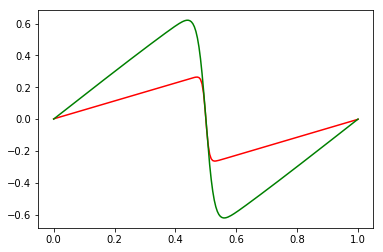

In [70]:
import numpy.fft as fft
t_0=0
t_f=10

m=200
nu = 0.01
x = numpy.linspace(0, 1, m)
delta_x = 1/(m-1)
dt = delta_x
N=int((t_f-t_0)/dt+1)
delta_t = (t_f-t_0)/N


L = 1.0
M = fft.fftfreq(m, 1.0 / m)
M_odd = M[numpy.nonzero(numpy.ravel(numpy.mod(M, 2)))]
k = M / L

u=  numpy.sin(2*numpy.pi*x)


for n in range(N):
    ur=fft.fft(u)- delta_t*1.0j * k * fft.fft(u**2)/2 - delta_t * k**2 *nu *fft.fft(u)
    u = fft.ifft(ur).real

    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, u, 'r')
axes.plot(x,ufunc(x,0.5,nu),'g')

Reference:

analytic solution cited from :Belal M., Hasan N. (2016) Solution of Viscous Burgers Equation Using a New Flux Based Scheme. In: Cushing J., Saleem M., Srivastava H., Khan M., Merajuddin M. (eds) Applied Analysis in Biological and Physical Sciences. Springer Proceedings in Mathematics & Statistics, vol 186. Springer, New Delhi


crank-nicolson theory: Crank-Nicolson Type Method for Burgers Equation[Sachin S. Wani and Sarita H. Thakar]


Lecture notes